# Pandas

[Pandas](https://pandas.pydata.org) is one one of the most important modules in the toolkit of a Data Scientist.
It focuses on the analysis of timeseries or structured data, i.e., data that can be represented by a sequence of events or a table.
Pandas provides a wide range of convenient function to access, manipulate, and analyse such data.

As with the other modules, there is a commonly used abbreviation and we typically use n ```pd``` for pandas.

More importantly, the underlying data format called "dataframe" has become the de-facto standard to exchange structured data, and many packages take dataframes as input.

In the following, we will use the iris dataset, which is one of the simplest datasets that are frequently used to demonstrate data science approaches.
It contains data about 3 different types of the [iris flower](http://en.wikipedia.org/wiki/Iris_(plant) ):

* Setosa, 
* Versicolour and
* Virginica

The dataset was [originally introduced](http://en.wikipedia.org/wiki/Iris_flower_data_set) by Sir Robert Fisher in 1936 as an example for discriminant analysis and contains the following features (measured in cm):

* Sepal Length, 
* Sepal Width, 
* Petal Length and 
* Petal Width.

The data are often included as demo datasets in various data science packages and also available on public repositories such as the [Iris Data Set](https://archive.ics.uci.edu/ml/datasets/iris) entry on the UCI Machine Learning Repository. In this case, we use the copy from the [data archive in Seaborn](https://github.com/mwaskom/seaborn-data), which is a copy of the UCI repository, but with some added information such as a description in the data what the columsn mean.

The data looks like:
```
,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
...
```

The colums have the following meaning:
* The first column (without name) is a running index
* Then there are four columns with descriptive variables ("features")
* The final variable is the species of the iris flower.

The data are stored in CSV format (comma separated values) which is very common for small (-ish) structured data. For larger files, we would typically use more efficient file formats such as [Apache Parquet](https://parquet.apache.org/)

In a first step, we read the contents of the file and store the data in a new dataframe. As mentioned when we first worked with files in Python, we do not *usually* do this manually, but use one of the many convenient functions that are already provided. In our case, Pandas knows how to read CSV files using the [read_csv](https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html) function.
Since we know that the first column (starting to count from zero) is an index, we tell pandas this.



In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns


iris_df = pd.read_csv('iris.csv', index_col=0)

We can then print the first few lines of the dataframe to become familiar with its structure

In [4]:
iris_df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


We can look at the frequency with which a certain value appears for one of the variables. \
These frequency plots are called ```histograms```.

For illustration, we use two variables in plots next to each other. \
This means that the "axis" in which we interact with the plot is no longer a single variable, but now an array. The left (first) plot can be accessed with ```ax[0]```, and correspondingly for the right plot ```ax[1]```. When making the plot, we then tell Seaborn where to put the histogram.

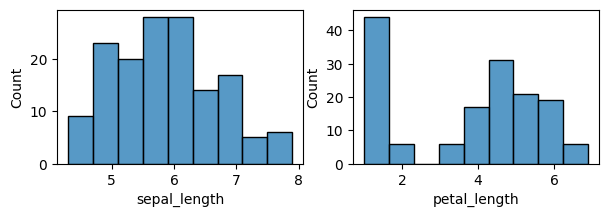

In [10]:
fig, ax = plt.subplots(ncols=2,figsize=(7, 2))

sns.histplot(data=iris_df, x='sepal_length', ax = ax[0])
sns.histplot(data=iris_df, x='petal_length', ax = ax[1])
plt.show()

Note that Seaborn added "count" on the y-axis automatically as we count the frequency of occurences in a histogram.

We would probably want to know how this depends on the species of the iris flower. \
Here, Seaborn becomes more convenient to use - we can do the same thing with matplotlib but it is not quite as convenient. By adding the parameter ```hue```, Seaborn splits the histogram by the type of flower we consider in our data, adds a separate colour to each of them and adds a legend explaining what is what.


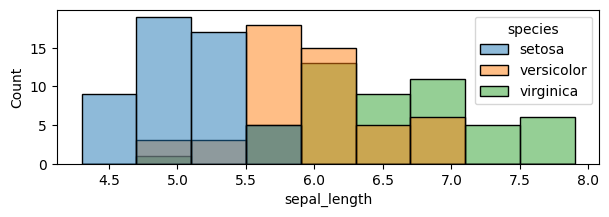

In [19]:
fig, ax = plt.subplots(ncols=1,figsize=(7, 2))

sns.histplot(data=iris_df, x='sepal_length', hue='species')
plt.show()

We also want to know how two variables behave when we compare them to each other. We can do this with a "scatterplot" where each data-point from two variables is "scattered" (hence the name) in the x-y plane. We can also use ```relplot``` for the same effect (but with different options).

If we have a large dataset, we can use ```histplot``` again and pass two variables for ```x``` and ```y```. Then, we do not plot individual data points but two-dimensional histgrams.

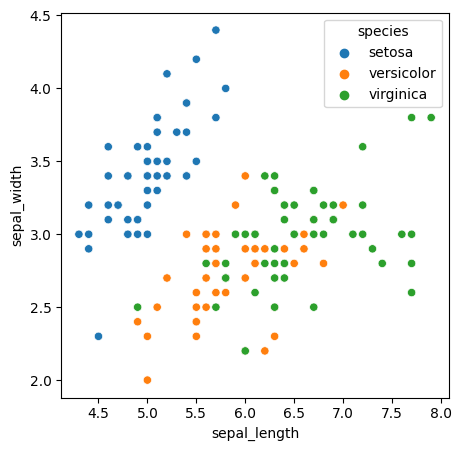

In [27]:
fig, ax = plt.subplots(ncols=1,figsize=(5, 5))
sns.scatterplot(data=iris_df, x="sepal_length", y="sepal_width", hue='species')
plt.show()

We will also want to look at all combinations, Seaborn provides a convenient function for this, the ```pairplot```. This is a matrix of all combinations of scatterplots from all (or: a selection of) variables. We place the frequency plot (histogram) of each variable on the diagonal. \
For lage datasets, we can use ```kind='hist'``` to use histograms instead of scatterplots. \
Using the ```height``` parameter, we can set the height of each individual plot and use this to control the overall size.

For more details, see the [pairplot documentation](https://seaborn.pydata.org/generated/seaborn.pairplot.html).

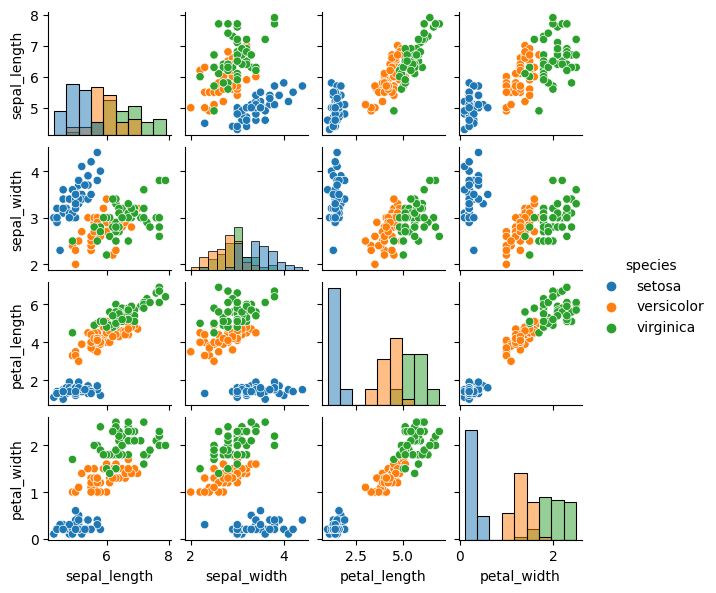

In [32]:
sns.pairplot(data=iris_df, hue="species", kind='scatter', diag_kind='hist', height = 1.5)
plt.show()